In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Dataset "Amazon Top 50 Bestselling Books 2009 - 2019"

In [2]:
print(df.shape)

(550, 7)


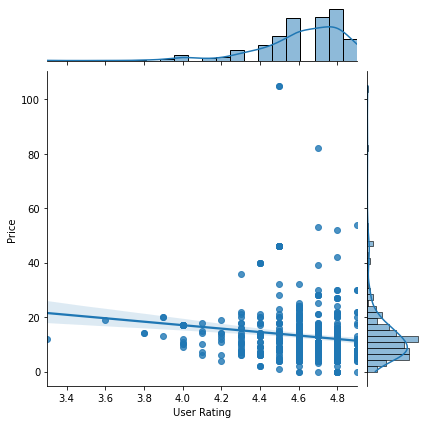

In [3]:
sns.jointplot(x='User Rating', y='Price', 
              data=df, kind='reg')

Книги с хорошим рейтингом не такие уж и дорогие

In [4]:
top_book = df.groupby('Name')[['User Rating']].sum()\
    .sort_values('User Rating', ascending = False).head()
top_book.style.bar()

,User Rating
Name,
"Publication Manual of the American Psychological Association, 6th Edition",45.000000
"Oh, the Places You'll Go!",39.200000
StrengthsFinder 2.0,36.000000
The Very Hungry Caterpillar,34.300000
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,32.500000


У книги "Публикация руководства американской психологической ассоциации 6-е издание" наибольший рейтинг

<AxesSubplot:ylabel='Author'>

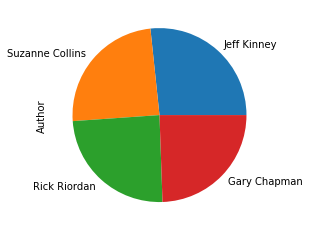

In [5]:
song_popularity = df['Author'].value_counts().head(4)
song_popularity.plot(kind='pie', rot='45', y='Count')

Самый популярный автор - Jeff Kinney

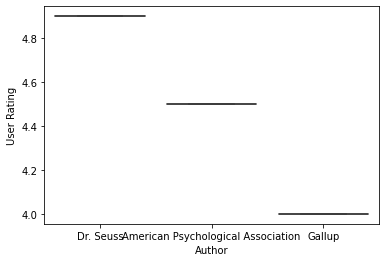

In [6]:
top_name = df.Name.value_counts().sort_values(ascending=False).head(3).index.values
top_name
ax = sns.boxplot(x="Author", y="User Rating", 
            data=df[df.Name.isin(top_name)])

Доктор Сьюз имеет хороший рейтинг (Автор "Кот в шляпе", "Гринч")

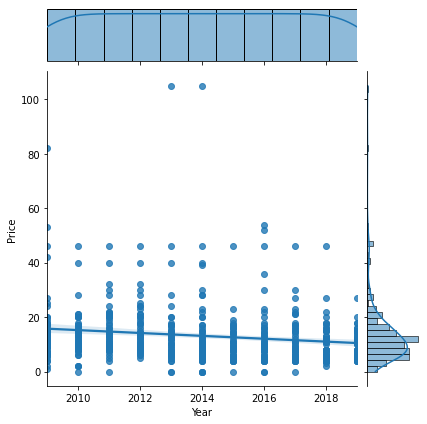

In [7]:
sns.jointplot(x='Year', y='Price', 
              data=df, kind='reg')

Медленный спад цен на книги за 2009-2019г.

In [8]:
price = df.pivot_table(
                        index='User Rating', 
                        columns='Year', 
                        values='Price', 
                        aggfunc=sum).fillna(0).applymap(float)

price

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
User Rating,,,,,,,,,,,
3.3,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.6,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
3.8,0.0,0.0,0.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
3.9,0.0,0.0,0.0,0.0,33.0,20.0,0.0,0.0,0.0,0.0,0.0
4.0,28.0,17.0,17.0,27.0,27.0,26.0,17.0,29.0,17.0,0.0,0.0
4.1,0.0,10.0,15.0,0.0,20.0,0.0,18.0,7.0,0.0,0.0,0.0
4.2,31.0,25.0,17.0,14.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
4.3,45.0,32.0,71.0,28.0,23.0,9.0,0.0,36.0,27.0,39.0,22.0
4.4,17.0,91.0,132.0,91.0,66.0,47.0,20.0,14.0,20.0,38.0,13.0


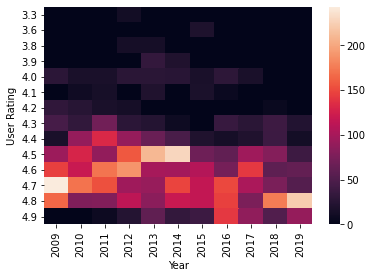

In [9]:
ax = sns.heatmap(price)

У книг с рейтингом ниже 4.3 прайс маленький. От 4.5 стоимость книг повышается

<AxesSubplot:ylabel='User Rating'>

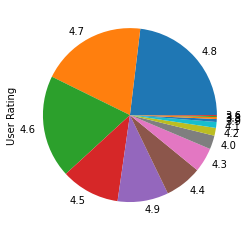

In [10]:
y = df["User Rating"].value_counts()
y.plot(kind="pie")

Больше всего ставят оценку 4.8

In [11]:
data= df.groupby('Author')[['User Rating','Reviews', 'Price','Year']].sum()\
     .sort_values('Price', ascending=False)
data.head()

,User Rating,Reviews,Price,Year
Author,,,,
American Psychological Association,45.0,85800,460,20135
The College Board,26.3,6812,236,12076
American Psychiatric Association,9.0,13358,210,4027
Gary Chapman,52.1,145958,189,22154
Gallup,36.0,45621,153,18117


array([[<AxesSubplot:xlabel='User Rating', ylabel='User Rating'>,
        <AxesSubplot:xlabel='Reviews', ylabel='User Rating'>,
        <AxesSubplot:xlabel='Price', ylabel='User Rating'>,
        <AxesSubplot:xlabel='Year', ylabel='User Rating'>],
       [<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Reviews'>,
        <AxesSubplot:xlabel='Price', ylabel='Reviews'>,
        <AxesSubplot:xlabel='Year', ylabel='Reviews'>],
       [<AxesSubplot:xlabel='User Rating', ylabel='Price'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Year', ylabel='Price'>],
       [<AxesSubplot:xlabel='User Rating', ylabel='Year'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Year', ylabel='Year'>]], dtype=object)

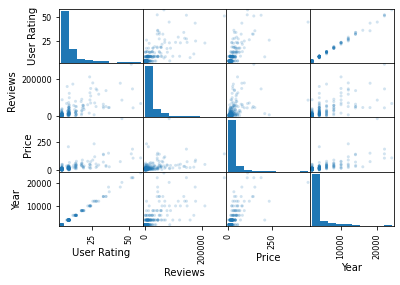

In [12]:
pd.plotting.scatter_matrix(data, alpha=0.2)

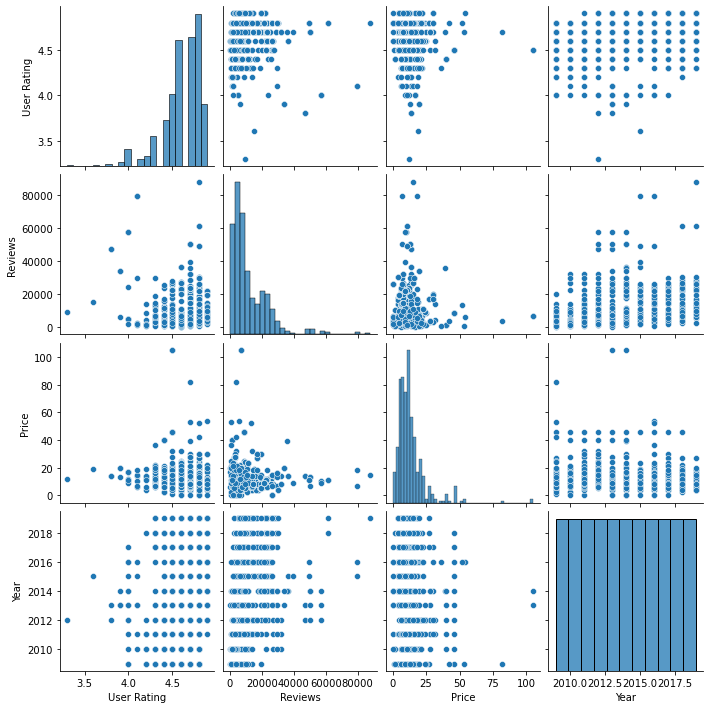

In [13]:
sns_plot = sns.pairplot(
    df[['User Rating','Reviews', 'Price','Year']])
sns_plot

Больше рейтинг - больше отзывов. Средний прайс - много отзывов (покупают бюджетные книги). Цена на книги практически не изменяется